## Info 113 Introduction to Data Science
## Homework 3: from VI-ME-BA-BAR to POM

# Part 2: Analyze data
We have now 4 datasets:
- one with only 2 features (<b>R</b>edness and <b>E</b>longation) called <b>RE_data.csv</b>
- one with only 21 features (<b>C</b>olor and <b>S</b>hape features) called <b>CS_data.csv</b>
- one with 14580 features (all pixels of 81x69x3 <b>raw</b> images) called <b>RAW_data.csv</b>
- one with 3072 features (all pixels of 32x32x3 <b>crop</b>ped images) called <b>CROP_data.csv</b>.

We will compare the performances of various classifiers on those 4 datasets. Thus, we are going to start doing "real" POM: Probability, Optimization, and Modeling. We will proceed in a "greedy" way, eliminating some non promising avenues as we go, and not revisiting them for the moment:

1. Which dataset version should we keep? Should we or not scale variables (using variable standardization)?
2. Which learning machine of a standard toolkit (scikit-learn) is most promising?

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import our own code
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *

# Step 1: Select data representation
Which dataset version should we keep? Should we do or not a variable standardization?

<u>Question 0.1</u> List all the datasets in directory `data_dir = "./mini-dataset/"` and call the resulting list `data_list`.

<u>Question 0.2</u> Call `check_datasets(data_list)` to view some statistics on the datasets. If you want to check how this code is written, type `??check_datasets(data_list)``.

In [3]:
# Import our own code
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *

In [4]:
# Answer to question 0.1
# List the datasets
data_dir = './mini-dataset/'
data_list = ls(data_dir + '*_data.csv')
data_list

['./mini-dataset/RAW_data.csv',
 './mini-dataset/RE_data.csv',
 './mini-dataset/CS_data.csv',
 './mini-dataset/CROP_data.csv']

In [5]:
# Answer to question 0.2
# Check the dataset sizes
check_datasets(data_list)

Dataset  num. examples  num. features  num. apples  num. bananas
0     RAW            491          14581          333           158
1      RE            491              3          333           158
2      CS            491             22          333           158
3    CROP            491           3073          333           158

### Question 1: Pandas 
#### Load, visualize, and preprocess data
In previous classes we have leaned about `numpy arrays`. It is time now to learn about `pandas dataframes`. Those are also arrays, but a different kind of python objects, with more properties, supporting fancy database functions and having quite a few display functions and nice simple summary statistics, check the documentation. 

<u>Question 1.0</u> In an editor, open `RL_data.csv` or another of the dataset files to see how it looks like. The dataset is formatted in the CSV format (comma separated file). The examples are in lines and the features are separated by commas. The first line is the header. You may also make a call to a UNIX command to view the first few lines of the file.

<u>Question 1.1</u> Load `RL_data.csv` as a pandas dataframe called `df`. Show the first few lines using the method `head`.

<u>Question 1.2</u> Compute simple statistics using the method `describe`.

<u>Question 1.3</u> Imagine that you do now know how to make a heat map (or you do not remember). Think of using a search engine, type the keywords: "pandas heatmap". I found <a href="https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe">this post</a>, for instance. Now find a way of showing the dataset as a heat map.

<u>Question 1.4</u> You remember that it is often useful to `standardize` the columns of the data matrix to put them all on thre same scale. Change your dataframe `df` to `df_scaled` by subtracting the mean of all columns and dividing by the standard deviation. Perform again the steps of questions 1.1, 1.2, and 1.3. What do you notice?

<u>Question 1.5</u> Write a function that takes as input a data frame `df` containing a dataset and returns a dataframe `df_scaled` with the columns standardized <b>EXCEPT THE TARGET VALUES</b> of the last column. Use this template for your code:

    def standardize_df(df):
    '''Standardize all the columns except the last one (target values).'''
    # YOUR CODE HERE
    return df_scaled
    
Test your function with the same dataframe as in the previous questions and use the methods `head` and `describe` to verify that all the columns are standardized, except the last one.

In [6]:
# Answer to question 1.0
!head ./mini-dataset/RE_data.csv

redness,elongation,fruit
8.429611650485437,1.4032012759326986,1.0
42.89607843137255,1.7032009898154288,1.0
56.354066985645936,1.5508105645577395,1.0
-10.528846153846153,1.7773426521360935,1.0
-17.131386861313867,2.047174441534352,1.0
36.041666666666664,1.4139561143744013,1.0
34.744932432432435,1.2379057682280559,1.0
1.8179190751445087,1.0839275628229141,1.0
3.34106529209622,1.0972000640347488,1.0


In [7]:
# Answer to question 1.1
df = pd.read_csv(os.path.join(data_dir, 'RE_data.csv'))
df.head()

redness  elongation  fruit
0   8.429612    1.403201    1.0
1  42.896078    1.703201    1.0
2  56.354067    1.550811    1.0
3 -10.528846    1.777343    1.0
4 -17.131387    2.047174    1.0

In [8]:
# Answer to question 1.2
df.describe()

redness  elongation       fruit
count  491.000000  491.000000  491.000000
mean    17.863426    1.468878    0.356415
std     21.805386    0.521078    0.935280
min    -47.045455    1.000000   -1.000000
25%      3.895620    1.161664   -1.000000
50%     14.380952    1.300111    1.000000
75%     33.848108    1.598103    1.000000
max    100.364865    5.231697    1.000000

In [9]:
# Answer to question 1.3
df.style.background_gradient(cmap='Blues')
# This way of creating heat maps is pretty cool, we do not need to standardize features

In [10]:
# Answer to question 1.4
df_scaled = (df-df.mean())/df.std()
df_scaled.head()
# We notice that the last column changed, the target values are no longer +-1

redness  elongation     fruit
0 -0.432637   -0.126039  0.688119
1  1.148003    0.449690  0.688119
2  1.765190    0.157238  0.688119
3 -1.302076    0.591975  0.688119
4 -1.604870    1.109809  0.688119

In [11]:
# We notice that the mean is not exactly 0, this depends on the machine precision.
df_scaled.describe()

redness    elongation         fruit
count  4.910000e+02  4.910000e+02  4.910000e+02
mean  -1.085350e-16 -8.266752e-16 -3.226204e-15
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.976736e+00 -8.998221e-01 -1.450277e+00
25%   -6.405668e-01 -5.895726e-01 -1.450277e+00
50%   -1.597070e-01 -3.238798e-01  6.881193e-01
75%    7.330612e-01  2.479972e-01  6.881193e-01
max    3.783535e+00  7.221221e+00  6.881193e-01

In [12]:
# Avec ce type de heat map, les couleurs sone les memes apres standatdization
df_scaled.style.background_gradient(cmap='Blues')

In [13]:
def standardize_df(df):
    '''Standardize all the columns except the last one (target values).'''
    df_scaled = (df-df.mean())/df.std()
    df_scaled.iloc[:, -1] = df.iloc[:, -1]
    return df_scaled

df_scaled = standardize_df(df)
df_scaled.head()

redness  elongation  fruit
0 -0.432637   -0.126039    1.0
1  1.148003    0.449690    1.0
2  1.765190    0.157238    1.0
3 -1.302076    0.591975    1.0
4 -1.604870    1.109809    1.0

In [14]:
df_scaled.describe()

redness    elongation       fruit
count  4.910000e+02  4.910000e+02  491.000000
mean  -1.085350e-16 -8.266752e-16    0.356415
std    1.000000e+00  1.000000e+00    0.935280
min   -2.976736e+00 -8.998221e-01   -1.000000
25%   -6.405668e-01 -5.895726e-01   -1.000000
50%   -1.597070e-01 -3.238798e-01    1.000000
75%    7.330612e-01  2.479972e-01    1.000000
max    3.783535e+00  7.221221e+00    1.000000

### Question 2: Select the best representation
We are now going to loop over all datasets and compare the performance of our baseline method (one nearest neighbor classifier) with and without variable scaling. 

<u>Question 2.1:</u> Import the scikit-learn (`sklearn`) one nearest neighbor classifier and name it `sklearn_model`. Also import the `balanced_accuracy_score` and name it sklearn_metric.

<u>Question 2.2:</u> Call `df_cross_validate(df, sklearn_model, sklearn_metric)` and collect the results, then print the training and test performance and their error bars. <b>Tip:</b> look at the bottom of the code using `??df_cross_validate` to get an idea on how to print the results. 

<u>Question 2.3:</u> Create:
- a list containing all the dataset dataframes and call it `all_data_df`
- a list containg all the dataset names and call it `data_name`. 

Then run the function `systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)` and display the results.

<u>Question 2.4:</u> Create:
- a list containing all the SCALED datasets (variables standardized) and call it `all_scaled_data_df`

Then run again `systematic_data_experiment` on `all_scaled_data_df` and display the results.

<u>Question 2.5:</u> Fuse the results of the two previous question by creating a dataframe called `joint_results`. Assign `result_scaling.perf_te` to a column called `'SCALED'` and `result_noscaling.perf_te` to a column called `'NOT SCALED'`. Display the results.

<u>Question 2.6:</u> Visualize `joint_results` with a histogram. Does variable scaling always help?

In [15]:
# Answer to question 2.1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
sklearn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
# Answer to question 2.2
??df_cross_validate
p_tr, s_tr, p_te, s_te = df_cross_validate(df, sklearn_model, sklearn_metric)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 1.00 +- 0.00
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.64 +- 0.03


In [17]:
# Answer to question 2.3
data_name = [os.path.basename(f)[:-9] for f in data_list]
all_data_df = [pd.read_csv(file) for file in data_list]
print('NO SCALING')
result_noscaling = systematic_data_experiment(data_name, all_data_df, sklearn_model, sklearn_metric)
result_noscaling.style.background_gradient(cmap='Blues')

NO SCALING
KNEIGHBORSCLASSIFIER


In [18]:
# Answer to question 2.4
all_scaled_data_df = [standardize_df(df) for df in all_data_df]
print('WITH SCALING')
result_scaling = systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)
result_scaling.style.background_gradient(cmap='Blues')

WITH SCALING
KNEIGHBORSCLASSIFIER


In [19]:
# Answer to question 2.5
joint_results = pd.DataFrame()
joint_results['SCALED'] = result_scaling.perf_te
joint_results['NOT SCALED'] = result_noscaling.perf_te
joint_results

SCALED  NOT SCALED
RAW   0.554434    0.571887
RE    0.615440    0.642204
CS    0.792288    0.546047
CROP  0.712340    0.747946

Text(0, 0.5, 'balanced_accuracy_score')

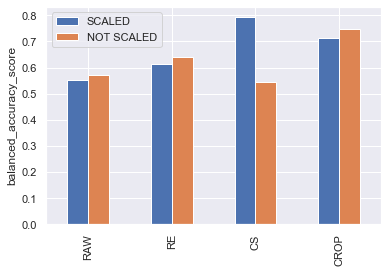

In [20]:
# Answer to question 2.6
# The best representation is CS SCALED
joint_results.plot.bar()
plt.ylabel(sklearn_metric.__name__)

## Step 2: Indentify the best model
We are now ready to perform systematic experiments on various models. We will use the methods proposed in the variable `classifiers` of <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">these scikit-learn examples</a>, compare classifier performances on the dataset `CS_SCALED`:

<u>Question 3.1:</u> Create a variable `data_df` and assign to it the data frame of the scaled version of the CS dataset.

<u>Question 3.2:</u> Create a variable `model_name` and a variable `model_list` containing the list of model names and the list of models (classifiers) from the <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">the scikit-learn examples</a> we pointed you to.

<u>Question 3.3:</u> Call `systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)` and display the results. 

<u>Question 3.4:</u>
Which method performs best? <b>Tip:</b> Use <a href="https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.Series.argmax.html">argmax</a>.

<u>Question 3.5:</u> <b> Overfitting and underfitting.</b> There may be two reasons why a model performs poorly. It could either be <b>overfitting</b> or <b>underfitting</b> data. If the test performance is bad but the trainign performance is good, the model is overfitting. If both are bad, the model is under-fitting. 
1. Find which models have TEST performance UNDER THE MEDIAN test performance. 
2. Of those, we will say that models with TRAINING performance UNDER THE MEDIAN training performance are under-fitted, while those with TRAINING performance OVER THE MEDIAN are over-fitted.

Which models are over-fitted and which ones are under-fitted?

In [21]:
# Answer to question 3.1
data_df = all_scaled_data_df[2]

In [22]:
# Answer to question 3.2
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model_name = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
model_list = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [23]:
# Answer to question 3.3
compar_results = systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)
compar_results.style.background_gradient(cmap='Blues')

In [24]:
# Answer to question 3.4
compar_results.perf_te.argmax()

'Nearest Neighbors'

In [25]:
# Answer to question 3.5
analyze_model_experiments(compar_results)

Text(0, 0.5, 'balanced_accuracy_score')

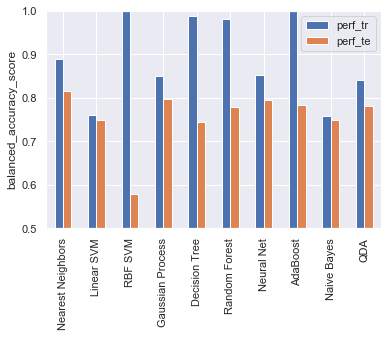

In [26]:
compar_results[['perf_tr', 'perf_te']].plot.bar()
plt.ylim(0.5, 1)
plt.ylabel(sklearn_metric.__name__)

# Part 3: Select project
You will find below some code that I wrote to prepare the class. We will go more in depth over these questions in later classes. This is a "preview" to help you select your project.

Our problem seems rather complex. Non-linear methods perform best. Unfortunately, these methods are hard to understand. To make progress, we must try to visualize our data again. Keep using the same
`data_df = data_df = all_scaled_data_df[2]`

## Heatmap
Since it is very important to visualize data, we show below a heatmap of the data in which the lignes and columns have been re-arranged according to their resemblance. This is an "unsupervised learning" visualization method, so we omit the last column.

In [27]:
data_df = all_scaled_data_df[2]
data_df.head()

R         G         B  M=maxRGB  m=minRGB     C=M-m  R-(G+B)/2  \
0 -0.094697 -0.802912  1.418747 -0.891020  1.336466 -1.696950  -0.432637   
1  0.503616 -0.772561 -0.666665  0.183203 -0.913998  0.879247   1.148003   
2  0.061006 -1.398826 -2.104806 -0.741563 -2.119769  1.269262   1.765190   
3 -1.726425  0.099504 -0.595447 -0.333516 -0.686620  0.349539  -1.302076   
4 -0.060727  1.399374  1.787878  1.139418  1.806535 -0.746776  -1.604870   

        G-B  G-(R+B)/2       B-R  ...   (G-B)/C   (B-R)/C   (R-G)/C  \
0 -1.660362  -1.347004  1.210587  ... -2.336012  0.646130  1.179120   
1 -0.029340  -0.573507 -0.898534  ... -0.629588 -0.462186  0.866252   
2  0.639794  -0.241299 -1.738912  ... -0.096683 -0.983712  0.919732   
3  0.529659   1.114701  0.760168  ...  0.582662  1.098479 -1.379813   
4 -0.394783   0.394178  1.483473  ...  0.414910  1.919623 -1.962907   

   (R+G+B)/3       C/V         W         H       W/H       W*H  fruit  
0   0.326008 -1.650431  0.249030  0.065306 -0.126039 -0.032573    1.0  
1  -0.499504  0.938614  0.278258 -0.273339  0.449690 -0.190080    1.0  
2  -1.801489  1.726784  2.273420  1.076728  0.157238  1.436246    1.0  
3  -1.107018  0.552259 -0.145793 -0.563028  0.591975 -0.426325    1.0  
4   1.630251 -0.909639 -1.142907 -1.194313  1.109809 -0.814331    1.0  

[5 rows x 22 columns]


Performing hierarchical clustering using euclidean for columns and euclidean for rows
Column clustering completed in 0.0 seconds
Row clustering completed in 0.5 seconds


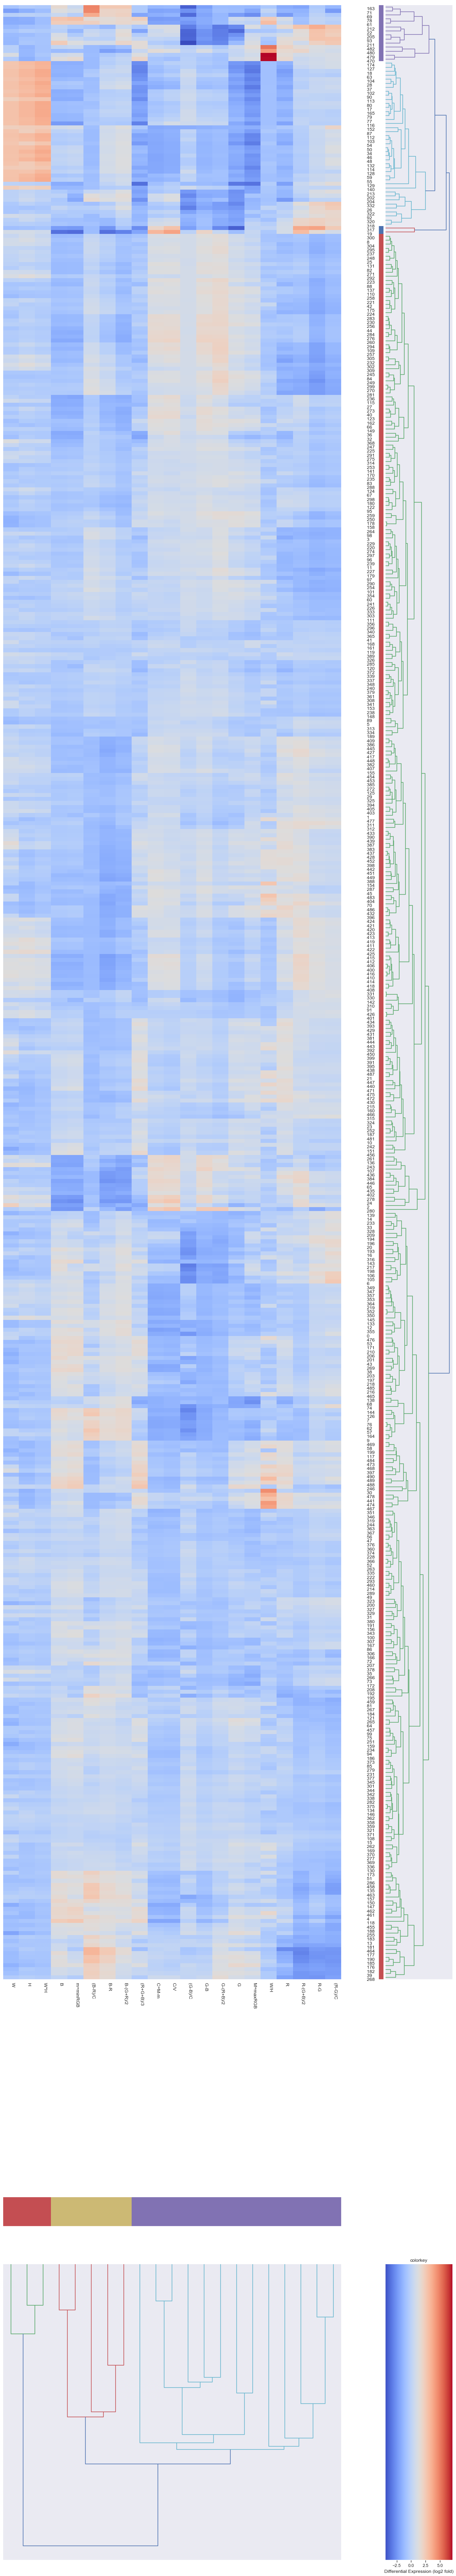

In [28]:
df = data_df.iloc[:, :-1]
heatmap(df, 'average', 'single', 'euclidean', 'euclidean', 'coolwarm')

For comparison, we show what happens if we randomize completely the order of the values.


Performing hierarchical clustering using euclidean for columns and euclidean for rows
Column clustering completed in 0.0 seconds
Row clustering completed in 0.5 seconds


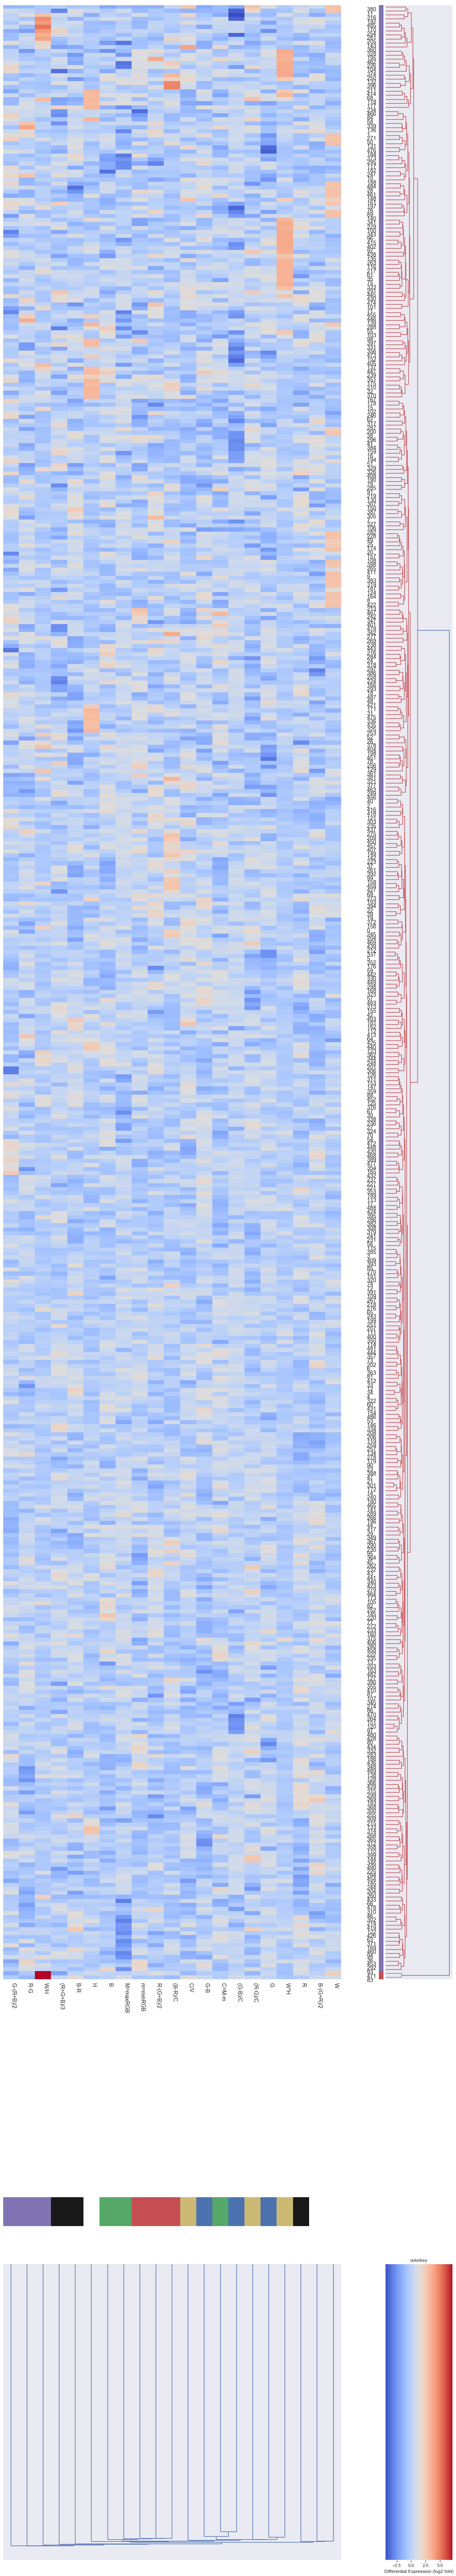

In [29]:
df2 = shuffle(df)
heatmap(df2, 'average', 'single', 'euclidean', 'euclidean', 'coolwarm')

## Correlation


We display the correlation matrix of `data_df`, following <a href="https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas">this page</a>.

In [30]:
corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

We can also use the hierarchical clustering.


Performing hierarchical clustering using euclidean for columns and euclidean for rows
Column clustering completed in 0.0 seconds
Row clustering completed in 0.0 seconds


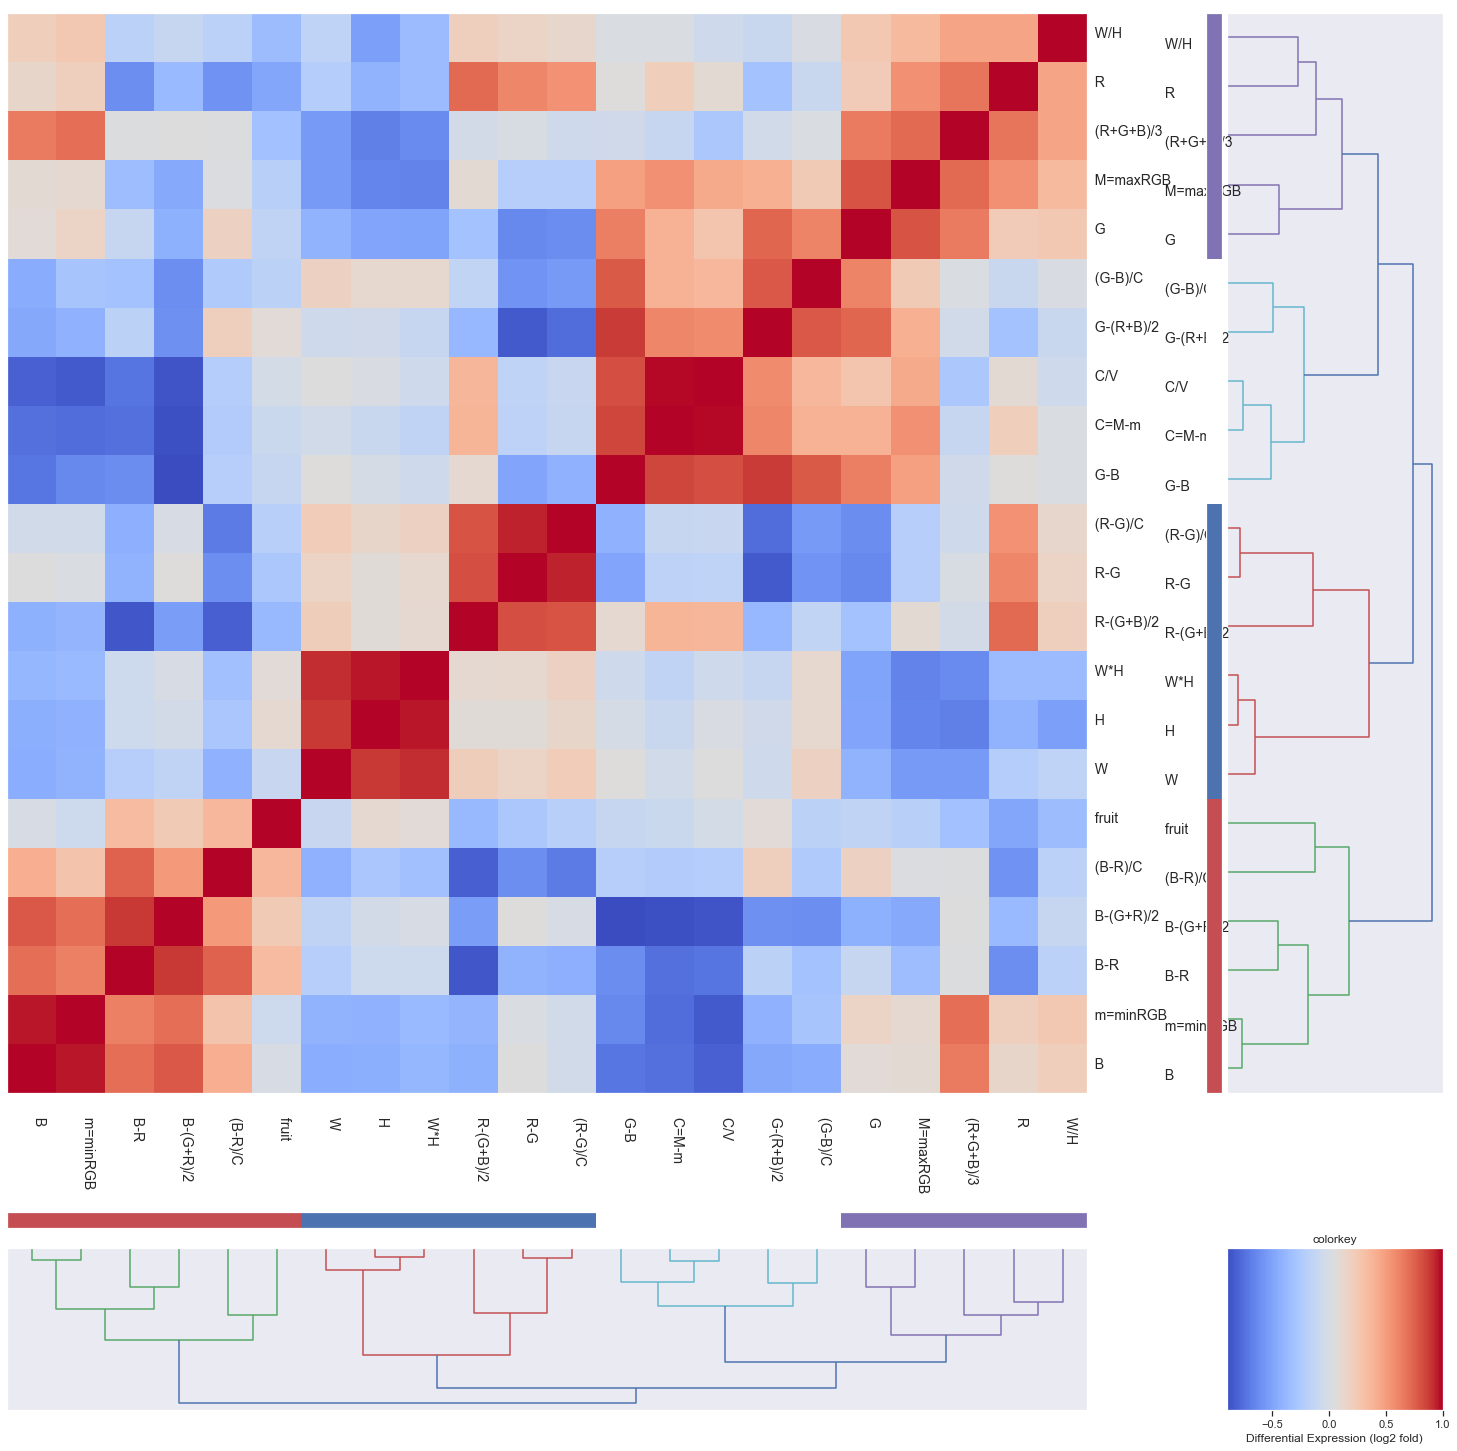

In [31]:
heatmap(corr, 'average', 'average', 'euclidean', 'euclidean', 'coolwarm', default_window_hight = 15, default_window_width = 15)

You can look for the most correlated or anti-correlated feature/variable.

In [32]:
np.fill_diagonal(corr.values, 0)
print('Most correlated: ' + corr.fruit.argmax())
print('Most anti-correlated: ' + corr.fruit.argmin())

Most correlated: (B-R)/C
Most anti-correlated: R


Are you surprised? I was surprised. In the first toy dataset we played with, apples were correlated with red. This is no longer the case. You can check out the dataset and understand why. In this new dataset, most apples are gree. Many bananas are yellow and some are green.

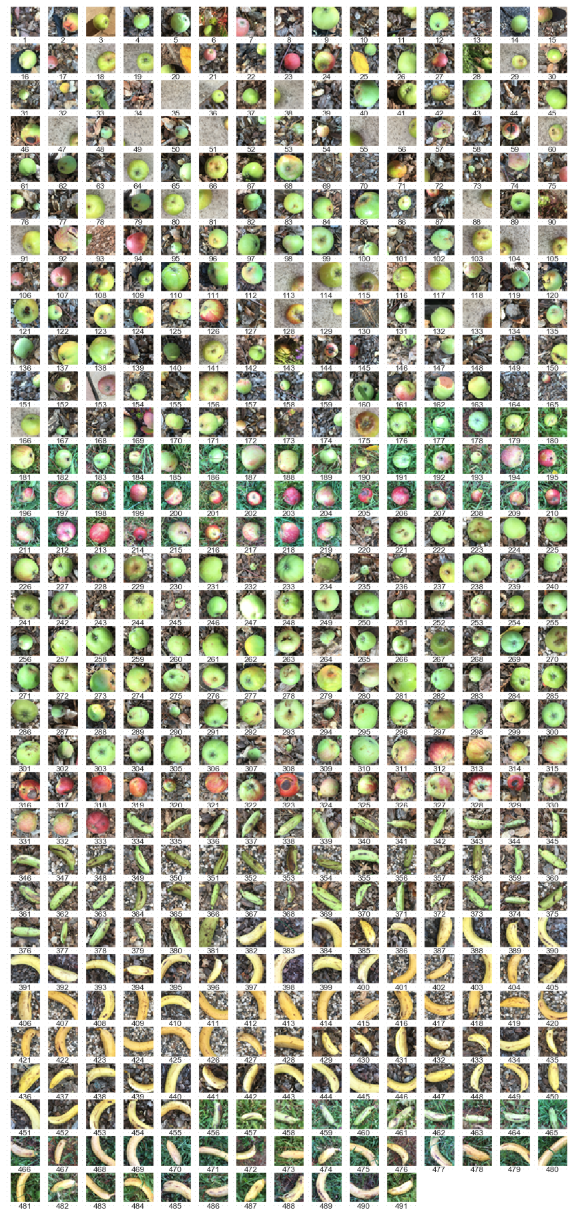

In [33]:
img = get_image(data_dir + 'all_data.png')
img

The dataset is not completely well balanced, so the Pearson correlation coefficient may not be the best way to identify the most informative features. Let's see whether S2N makes a difference.

In [34]:
s2n_coeff = s2n(data_df)
print('Largest s2n: ' + s2n_coeff.feat.argmax())
print('Smallest s2n: ' + s2n_coeff.feat.argmin())

Largest s2n: (B-R)/C
Smallest s2n: R


We get the same features with S2N and the Pearson correlation coefficient.

## Feature selection
We are going to perform some simple-minded feature selection with the Pearson correlation coefficient. This will allow us to do some data visualization.

Let us first sort all features by the absolute value of the Pearson correlation coefficient. Indeed, variables are informative no matter whether they are correlated or anti-correlated (since it suffices to multiply them by -1 to change the correlation direction).

In [35]:
# Sort by correlation coefficient
sval = corr['fruit'][:-1].abs().sort_values(ascending=False)
ranked_columns = sval.index.values
print(ranked_columns) 

['R' '(B-R)/C' 'R-(G+B)/2' 'B-R' 'W/H' '(R+G+B)/3' 'R-G' 'B-(G+R)/2'
 '(R-G)/C' 'M=maxRGB' '(G-B)/C' 'G' 'H' 'G-B' 'W' 'G-(R+B)/2' 'W*H'
 'C=M-m' 'm=minRGB' 'C/V' 'B']


We notice that the features that we had constructed in previous lessons 'R-(G+B)/2' and 'W/H' come in the 5 top most informative features. But there are others. Let us make all scatter plots of pairs of features for the 5 top ranked features.

In [36]:
fruit_name = ['Banana', 'Apple']
fruit_list = [fruit_name[int((i+1)/2)] for i in data_df["fruit"].tolist()]

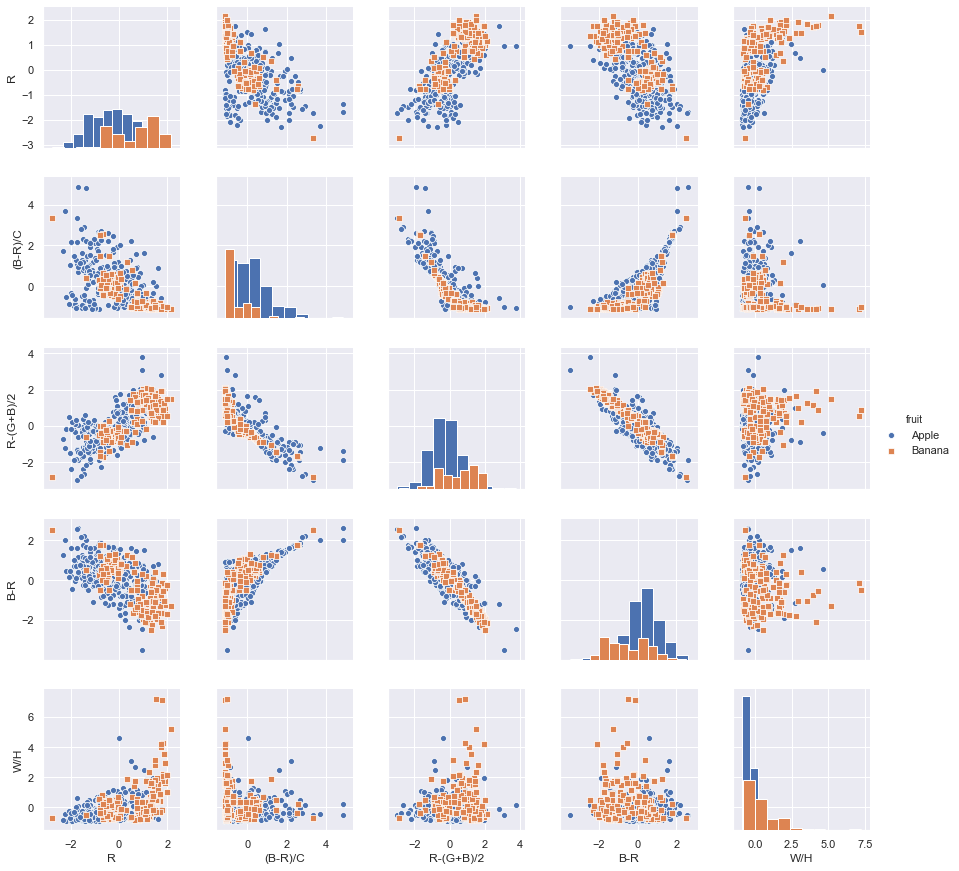

In [37]:
col_selected = ranked_columns[0:5]
df_new = pd.DataFrame.copy(data_df)
df_new = df_new[col_selected]
df_new['fruit'] = fruit_list
g = sns.pairplot(df_new, hue="fruit", markers=["o", "s"], diag_kind="hist")

It is interesting to see how many features are needed to obtain nearly as good performance as with all the features.

In [38]:
sklearn_model = KNeighborsClassifier(n_neighbors=3)
feat_lc_df = feature_learning_curve(data_df, sklearn_model, sklearn_metric)

KNEIGHBORSCLASSIFIER
['R' '(B-R)/C' 'R-(G+B)/2' 'B-R' 'W/H' '(R+G+B)/3' 'R-G' 'B-(G+R)/2'
 '(R-G)/C' 'M=maxRGB' '(G-B)/C' 'G' 'H' 'G-B' 'W' 'G-(R+B)/2' 'W*H'
 'C=M-m' 'm=minRGB' 'C/V' 'B']


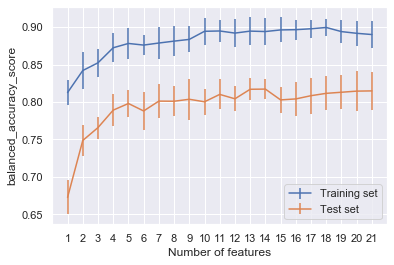

In [39]:
#feat_lc_df[['perf_tr', 'perf_te']].plot()
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_tr'], yerr=feat_lc_df['std_tr'], label='Training set')
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_te'], yerr=feat_lc_df['std_te'], label='Test set')
plt.xticks(np.arange(1, 22, 1)) 
plt.xlabel('Number of features')
plt.ylabel(sklearn_metric.__name__)
plt.legend(loc='lower right')

We see the, with 5 features, it is about as good as it gets, given the error bars.

We can then investigate all pairs of features among the top 5 to see which pair is best.

In [40]:
range(5)

range(0, 5)

In [41]:
best_perf = -1
std_perf = -1
best_i = 0
best_j = 0
for i in np.arange(5): 
    for j in np.arange(i+1,5): 
        df = data_df[[ranked_columns[i], ranked_columns[j], 'fruit']]
        p_tr, s_tr, p_te, s_te = df_cross_validate(df, sklearn_model, sklearn_metric)
        if p_te > best_perf: 
            best_perf = p_te
            std_perf = s_te
            best_i = i
            best_j = i
            
metric_name = sklearn_metric.__name__.upper()
print('BEST PAIR: {}, {}'.format(best_i, best_j))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

BEST PAIR: 0, 0
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.66 +- 0.03


Not too surprisingly the first two features are best. We can also run a different kind of feature selection, but the results are very similar.

In [42]:
# From https://scikit-learn.org/stable/modules/feature_selection.html
# 1.13.4.2. Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = data_df.iloc[:, :-1].to_numpy()
Y = data_df.iloc[:, -1].to_numpy()
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
ranked_columns = data_df.columns[np.argsort(-clf.feature_importances_)]
print(ranked_columns)

Index(['R', '(B-R)/C', 'R-(G+B)/2', '(G-B)/C', 'W/H', 'R-G', 'G-(R+B)/2', 'W',
       '(R-G)/C', 'G-B', 'G', 'B-R', 'M=maxRGB', 'H', '(R+G+B)/3', 'B-(G+R)/2',
       'C/V', 'W*H', 'C=M-m', 'B', 'm=minRGB'],
      dtype='object')


# Exploring the metadata
For those of you who will chose the project on how to find and correct bias in data, part of your work will be to analyze the metadata: can you predict for example "apple" vs. "banana" based on the meta-features? This would indicate some confounding factor.

In [43]:
metadata = pd.read_csv(os.path.join(data_dir, 'metadata.csv')) #, index_col='Num')
metadata.head()

Num          File Subset     Fruit     Color   Count             DateTime  \
0    1  IMG_3521.png   MISC  FRUIT-NA  COLOR-NA  NUM-NA  2019-07-19 17:39:45   
1    2  IMG_2818.png   MISC  FRUIT-NA  COLOR-NA  NUM-NA  2019-07-17 08:48:17   
2    3  IMG_4313.png   MISC  FRUIT-NA  COLOR-NA  NUM-NA  2019-07-21 09:36:05   
3    4  IMG_2819.png   MISC  FRUIT-NA  COLOR-NA  NUM-NA  2019-07-17 08:48:20   
4    5  IMG_2953.png   MISC  FRUIT-NA  COLOR-NA  NUM-NA  2019-07-17 09:03:13   

   GPSAltitude  GPSLatitude GPSLongitude> GPSImgDirection GPSDestBearing  \
0        334.0  37;53.7857N  122;15.5356W     356238/1463    356238/1463   
1        327.0  37;53.7943N  122;15.5461W   2224375/16003  2277333/16384   
2        313.0  37;53.7997N  122;15.5736W     352652/1409    352652/1409   
3        327.0  37;53.7943N  122;15.5461W       49647/394      49647/394   
4        330.0   37;53.796N  122;15.5511W     389855/1317    389855/1317   

  ShutterSpeedValue  SubsecTimeDigitized ExposureTime BrightnessValue  
0       84572/17235                  944         1/30       5396/1247  
1       84572/17235                  510         1/30      19223/5070  
2        49625/8401                  213         1/60     59991/11077  
3       84572/17235                   72         1/30    159250/38599  
4       84572/17235                  935         1/30     26857/12851

In [44]:
# Select images with a single apple or banana
is_apple = metadata['Fruit']=='APPLE'
is_banana = metadata['Fruit']=='BANANA'
count_one = metadata['Count']=='1-ONE'
apple_subset = metadata[is_apple & count_one]
banana_subset = metadata[is_banana & count_one]
print('Apples: {}'.format(apple_subset.shape))
print('Bananas: {}'.format(banana_subset.shape))

Apples: (333, 16)
Bananas: (158, 16)


In [45]:
# Only two variables are numerical, the others would have to be converted.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html may not be the best solution
# Read also https://www.kaggle.com/c/titanic/discussion/5379
# See also https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder

metadata.describe()

Num  GPSAltitude  SubsecTimeDigitized
count  1534.000000  1533.000000          1534.000000
mean    767.500000   328.069145           496.718383
std     442.971971    20.513714           290.339883
min       1.000000    49.000000             0.000000
25%     384.250000   329.000000           246.000000
50%     767.500000   330.000000           481.500000
75%    1150.750000   333.000000           758.750000
max    1534.000000   344.000000           996.000000

In [46]:
series = ['Num', 'GPSAltitude', 'SubsecTimeDigitized']
metadata_subset = apple_subset.copy()[series]
metadata_subset = metadata_subset.append(banana_subset.copy()[series])
na = len(apple_subset)
nb = len(banana_subset)
Y = np.append(np.ones([na, 1]), -1*np.ones([nb, 1]))
metadata_subset['fruit'] = Y
print(df.shape)
metadata_subset.head()

(491, 3)


Num  GPSAltitude  SubsecTimeDigitized  fruit
775  776        334.0                  106    1.0
776  777        331.0                  178    1.0
777  778        327.0                  917    1.0
778  779        328.0                  342    1.0
779  780        329.0                  252    1.0

In [47]:
# Rappel de la question 2.1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
sklearn_model = KNeighborsClassifier(n_neighbors=1)

In [48]:
naval = check_na(metadata_subset)

     GPSAltitude
895          NaN


In [49]:
metadata_subset[metadata_subset.isna()]=0

In [50]:
#metadata_subset.GPSAltitude[895]=0

In [51]:
check_na(metadata_subset)

Empty DataFrame
Columns: []
Index: []


Empty DataFrame
Columns: []
Index: []

In [52]:
p_tr, s_tr, p_te, s_te = df_cross_validate(metadata_subset, sklearn_model, sklearn_metric, n=10, verbose=False)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 1.00 +- 0.00
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.99 +- 0.01


In [53]:
corr = metadata_subset.corr()
corr.style.background_gradient(cmap='coolwarm')

##  Dimensionality reduction
Rather than doing feature selection, another avenue is to use feature transforms to reduce dimensionality, typically find the "principal directions"(directions of largest variance). This is achieved with SVD (the same algorithm we used last week to find the aspect ratio of an elongated object). There again I used my search engine and typed the keywords "pandas svd". I found a nice tutorial on <a href="https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/">this page</a> and a step-by-step procedure on <a href="https://cmdlinetips.com/2019/05/singular-value-decomposition-svd-in-python/">this page</a>. Can you transform the original data frame into a data frame with only 2 features (the two first principal directions)?

<u>Question 1:</u> Create a dataframe called `df_scaled` containing the standardized columns, except the last one (tip: use `drop` to eliminate the last column).

<u>Question 2:</u> Perform a singular value decomposition of `df_scaled` and call the resulting matrices u, s, v.

<u>Question 3:</u> Make a scree plot of the eigen values (square of the singular values). Save the plot in file 'svd_scree_plot.png'.

<u>Question 4:</u> Create a new dataframe `svd_df` with the two singular values as columns and the fruit type as index.

<u>Question 5:</u> Make pairwise scatter plots of the three first singular values.

<u>Question 6:</u> Compute the performances obtained with the 3 nearest neighbor method using the first 3 singular values.

In [54]:
# Answer to question 1
df = pd.read_csv(os.path.join(data_dir, 'CS_data.csv'))
df_bare = df.drop(columns=['fruit'])
df_scaled = (df_bare-df_bare.mean())/df_bare.std()
df_scaled.head()

R         G         B  M=maxRGB  m=minRGB     C=M-m  R-(G+B)/2  \
0 -0.094697 -0.802912  1.418747 -0.891020  1.336466 -1.696950  -0.432637   
1  0.503616 -0.772561 -0.666665  0.183203 -0.913998  0.879247   1.148003   
2  0.061006 -1.398826 -2.104806 -0.741563 -2.119769  1.269262   1.765190   
3 -1.726425  0.099504 -0.595447 -0.333516 -0.686620  0.349539  -1.302076   
4 -0.060727  1.399374  1.787878  1.139418  1.806535 -0.746776  -1.604870   

        G-B  G-(R+B)/2       B-R  ...       R-G   (G-B)/C   (B-R)/C   (R-G)/C  \
0 -1.660362  -1.347004  1.210587  ...  0.579199 -2.336012  0.646130  1.179120   
1 -0.029340  -0.573507 -0.898534  ...  1.031343 -0.629588 -0.462186  0.866252   
2  0.639794  -0.241299 -1.738912  ...  1.189200 -0.096683 -0.983712  0.919732   
3  0.529659   1.114701  0.760168  ... -1.457199  0.582662  1.098479 -1.379813   
4 -0.394783   0.394178  1.483473  ... -1.189423  0.414910  1.919623 -1.962907   

   (R+G+B)/3       C/V         W         H       W/H       W*H  
0   0.326008 -1.650431  0.249030  0.065306 -0.126039 -0.032573  
1  -0.499504  0.938614  0.278258 -0.273339  0.449690 -0.190080  
2  -1.801489  1.726784  2.273420  1.076728  0.157238  1.436246  
3  -1.107018  0.552259 -0.145793 -0.563028  0.591975 -0.426325  
4   1.630251 -0.909639 -1.142907 -1.194313  1.109809 -0.814331  

[5 rows x 21 columns]

In [55]:
# Answer to question 2
u, s, v = np.linalg.svd(df_scaled, full_matrices=True)
print('U {}'.format(u.shape))
print('S {}'.format(s.shape))
print('V {}'.format(v.shape))

U (491, 491)
S (21,)
V (21, 21)


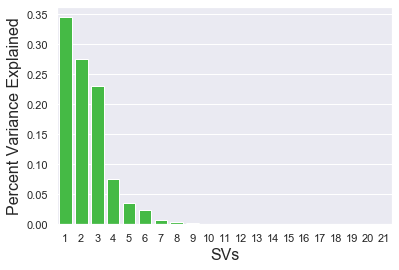

In [56]:
# Answer to question 3
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [57]:
# Answer to question 4
labels= ['SV'+str(i) for i in range(1,4)]
fruit_name = ['Banana', 'Apple']
fruit_list = [fruit_name[int((i+1)/2)] for i in df["fruit"].tolist()]
svd_df = pd.DataFrame(u[:,0:3], columns=labels)
svd_df['fruit'] = fruit_list
svd_df.head()

SV1       SV2       SV3  fruit
0 -0.082698  0.020103  0.011550  Apple
1  0.022860  0.032317  0.033502  Apple
2  0.063949  0.088905 -0.001070  Apple
3  0.011986 -0.031958 -0.060016  Apple
4 -0.045156 -0.092459 -0.008405  Apple

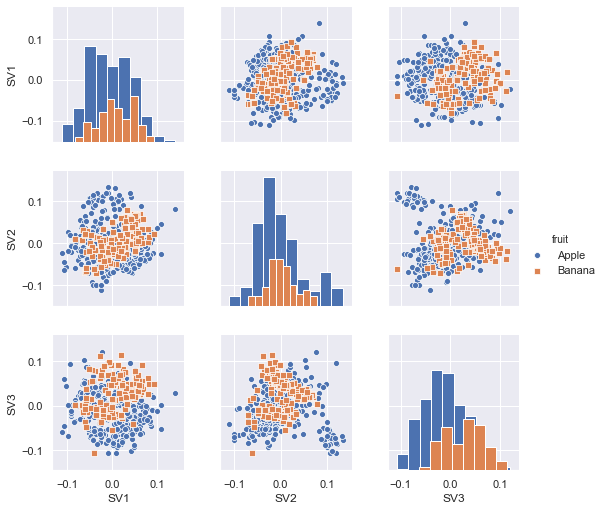

In [58]:
# Answer to question 5
g = sns.pairplot(svd_df, hue="fruit", markers=["o", "s"], diag_kind="hist")

In [59]:
# Answer to question 6
svd_df['fruit'] = df.iloc[:, -1].to_numpy()
p_tr, s_tr, p_te, s_te = df_cross_validate(svd_df, sklearn_model, sklearn_metric)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 1.00 +- 0.00
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.74 +- 0.02
